In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [2]:
#Convert date
def to_datetime(df):
    date = datetime.strptime(df, '%d.%m.%Y')
    return date.strftime("%Y-%m-%d")

In [3]:
df = pd.read_csv('../input/tesla-stock-price-new/Price Tesla.csv', sep=';')
df['Date'] = df['Date'].apply(lambda x: to_datetime(x))
df = df.sort_values('Date').reset_index(drop=True)

In [4]:
df.head()

,Date,Price,Open,Max,Min
0,2013-03-01,6.93,7.00,7.20,6.85
1,2013-03-04,7.12,6.95,7.17,6.94
2,2013-03-05,7.33,7.20,7.38,7.16
3,2013-03-06,7.54,7.40,7.58,7.39
4,2013-03-07,7.65,7.55,7.73,7.38


In [5]:
df.shape

(1928, 5)

Select the column "Price"

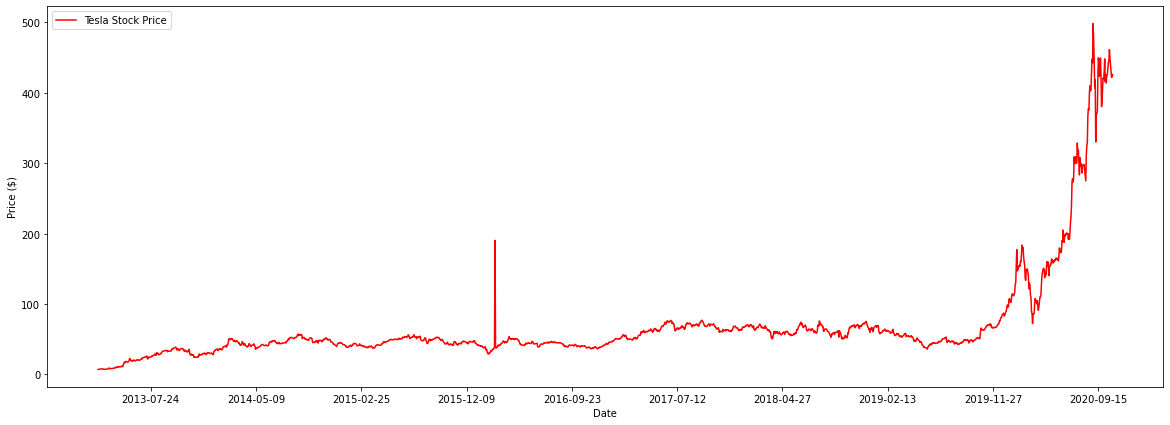

In [6]:
df['Price'] = df['Price'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Price'].values, label = 'Tesla Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Data Preprocessing

In [7]:
num_shape = 1900

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [9]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

# GRU

In [20]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

In [21]:
modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=1000, batch_size=16)

Epoch 1/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 2/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0093
Epoch 3/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0083
Epoch 4/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0073
Epoch 5/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0064
Epoch 6/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0050
Epoch 7/1000
115/115 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 8/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 9/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 10/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0023
Epoch 11/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0018
Epoch 12/1000
115/115 [==============================] - 1s 10ms/step - lo

115/115 [==============================] - 1s 10ms/step - loss: 6.6206e-04
Epoch 185/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4155e-04
Epoch 186/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.7849e-04
Epoch 187/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0831e-04
Epoch 188/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4256e-04
Epoch 189/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.5502e-04
Epoch 190/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.5843e-04
Epoch 191/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.3211e-04
Epoch 192/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.2071e-04
Epoch 193/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.0403e-04
Epoch 194/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.5428e-04
Epoch 195/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.2271e-04
Epoch 367/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.6042e-04
Epoch 368/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.5263e-04
Epoch 369/1000
115/115 [==============================] - 1s 12ms/step - loss: 6.1525e-04
Epoch 370/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.9075e-04
Epoch 371/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.6953e-04
Epoch 372/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.8620e-04
Epoch 373/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5948e-04
Epoch 374/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1752e-04
Epoch 375/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9180e-04
Epoch 376/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.9411e-04
Epoch 377/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 5.9972e-04
Epoch 549/1000
115/115 [==============================] - 2s 13ms/step - loss: 7.4369e-04
Epoch 550/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5083e-04
Epoch 551/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3575e-04
Epoch 552/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.2345e-04
Epoch 553/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.2208e-04
Epoch 554/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.6940e-04
Epoch 555/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3113e-04
Epoch 556/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5568e-04
Epoch 557/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9031e-04
Epoch 558/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0152e-04
Epoch 559/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.2059e-04
Epoch 731/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1741e-04
Epoch 732/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.5519e-04
Epoch 733/1000
115/115 [==============================] - 2s 14ms/step - loss: 5.5597e-04
Epoch 734/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.7818e-04
Epoch 735/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.7134e-04
Epoch 736/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.5536e-04
Epoch 737/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.7521e-04
Epoch 738/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.1051e-04
Epoch 739/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4522e-04
Epoch 740/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.5757e-04
Epoch 741/1000
115/115 [=

115/115 [==============================] - 1s 11ms/step - loss: 5.0262e-04
Epoch 913/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.9677e-04
Epoch 914/1000
115/115 [==============================] - 1s 12ms/step - loss: 5.7470e-04
Epoch 915/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.9988e-04
Epoch 916/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.2347e-04
Epoch 917/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.3388e-04
Epoch 918/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.0251e-04
Epoch 919/1000
115/115 [==============================] - 2s 15ms/step - loss: 5.6676e-04
Epoch 920/1000
115/115 [==============================] - 1s 12ms/step - loss: 4.6449e-04
Epoch 921/1000
115/115 [==============================] - 2s 14ms/step - loss: 6.6839e-04
Epoch 922/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.7386e-04
Epoch 923/1000
115/115 [=

In [22]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [23]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 520.481254176018
MAE: 18.13660919189453
RMSE: 22.814058257487158


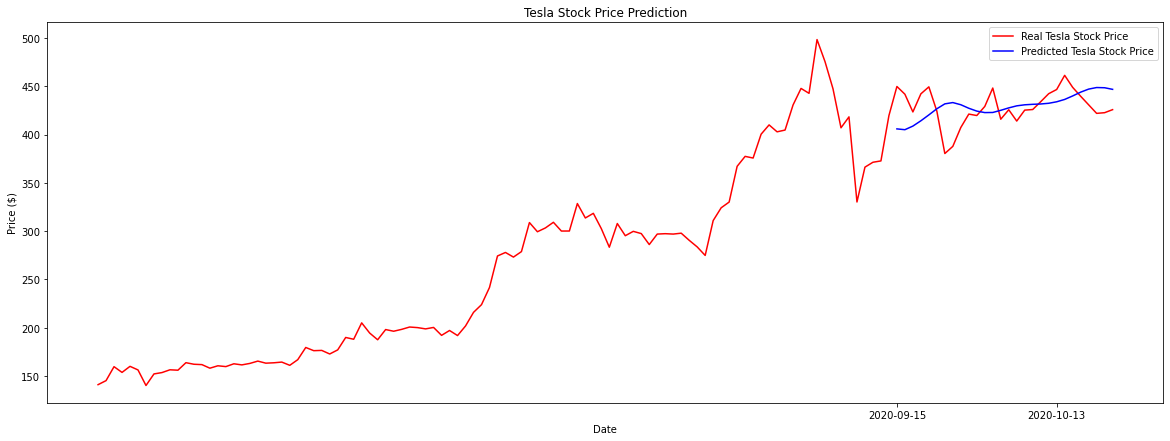

In [24]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### 20-day prediction

In [25]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = modelGRU.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [26]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

df_date = df[['Date']]

for h in range(20):
    kk = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    kk = pd.DataFrame([kk.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(kk)
df_date = df_date.reset_index(drop=True)

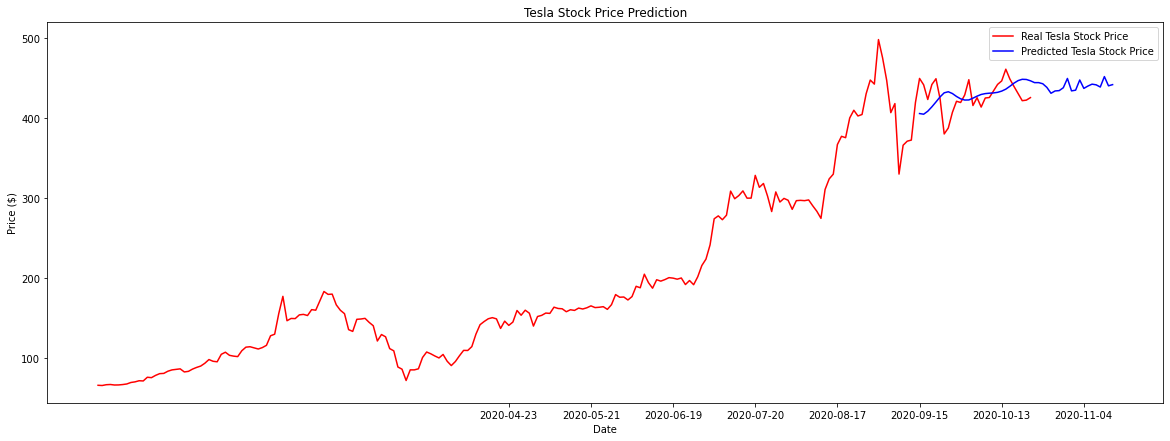

In [27]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df_date[1700:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()